
# Práctica 1: Sistema Masa–Resorte (Parte 1)
## Jordi Blasco Lozano

**Enunciado general.**  
En este cuaderno trabajaremos una progresión de modelos del sistema masa–resorte, empezando por el caso sin fuerza ni rozamiento y, gradualmente, añadiendo **interacción con parámetros**, **rozamiento (amortiguamiento)** y **fuerza externa sinusoidal**. En cada ejercicio encontrarás:
- Un **enunciado** con lo que se pide.
- Bloques de **preguntas y reflexión**.
- Debes generar un nuevo bloque con el código que se pide en cada ejercicio.

## Ejemplo de funciones para gráficas

A continuación se muestra el código, organizado en funciones, para poder mostrar diagramas de fase y campos de crecimiento:


In [1]:

# =========================================
# Importaciones y utilidades comunes
# =========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

try:
    from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, VBox, HBox
    import ipywidgets as widgets
except Exception as e:
    print("Si ipywidgets no está disponible, en Google Colab suele funcionar por defecto. "
          "Si no, instala con: pip install ipywidgets y reinicia el entorno.")

plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.grid"] = True

def phase_plot(x, v, x0, v0, title="Diagrama de fase (x vs v)"):
    plt.figure()
    plt.plot(x, v, lw=2)
    plt.scatter([x0], [v0], s=60, c='red', zorder=5, label="C.I.")
    plt.xlabel("x (posición)")
    plt.ylabel("v (velocidad)")
    plt.title(title)
    plt.legend()
    plt.show()

def growth_field_mass_spring(k=1.0, m=1.0, x0=None, v0=None, x_max=3.0, n_x=200):
    # Graficar dx/dt = v como función de x para condiciones iniciales dadas
    x_vals = np.linspace(-x_max, x_max, n_x)
    # Aquí dx/dt = v; pero v no es función directa de x sin resolver la dinámica.
    # Para ilustrar campo de crecimiento se puede graficar dv/dt vs x con v=0 (ejemplo lineal)
    dxdt = v0 if v0 is not None else 0.0  # dx/dt = v (constante para la CI)
    dvdt_vals = -(k/m) * x_vals

    plt.figure()
    plt.plot(x_vals, dvdt_vals, lw=2, label="dv/dt vs x (para v=0)")
    if x0 is not None and v0 is not None:
        plt.scatter([x0], [-(k/m)*x0], c='red', s=60, label="C.I.")
    plt.xlabel("x (posición)")
    plt.ylabel("dv/dt")
    plt.title("Campo de crecimiento: dv/dt en función de x")
    plt.legend()
    plt.show()



## Ejercicio 1. Comparación analítica vs. numérica (sin fuerza ni rozamiento)

**Enunciado.** Considera el sistema masa–resorte ideal sin rozamiento ni fuerzas externas:
$$
m \ddot{x} + k x = 0.
$$
1. Obtén la solución **analítica** $x(t)$ para condiciones iniciales $x(0)=x_0$, $\dot{x}(0)=v_0$.
2. Resuelve **numéricamente** el sistema con las mismas condiciones y compara $x(t)$ analítica vs. numérica.
3. Muestra las gráficas de:
   - $x(t)$
   - Diagrama de fase $x$–$\dot{x}$
   - Campo de crecimiento interpretado como aceleración $\ddot{x}=dv/dt$ en función de la posición $x$
     (marca la **condición inicial** con un punto rojo).

**A continuación se proporciona la solución:**

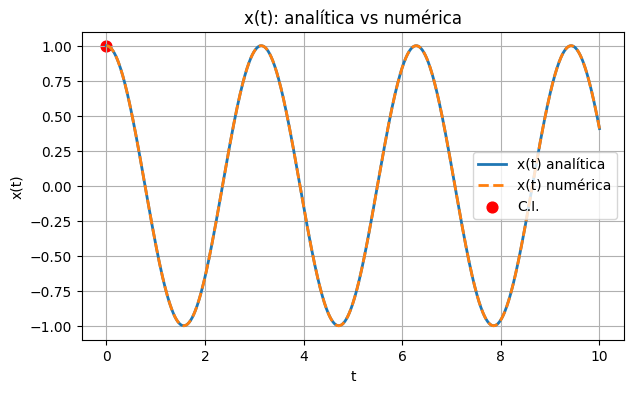

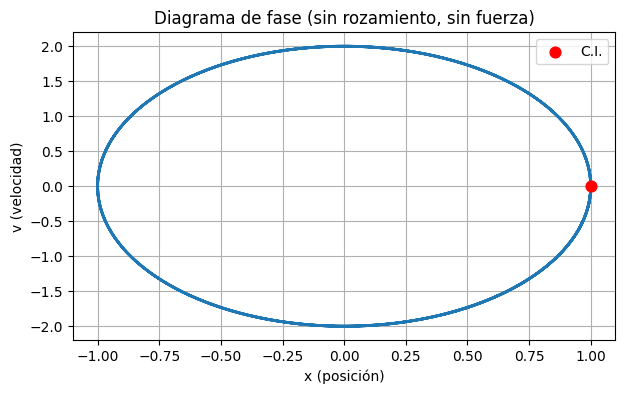

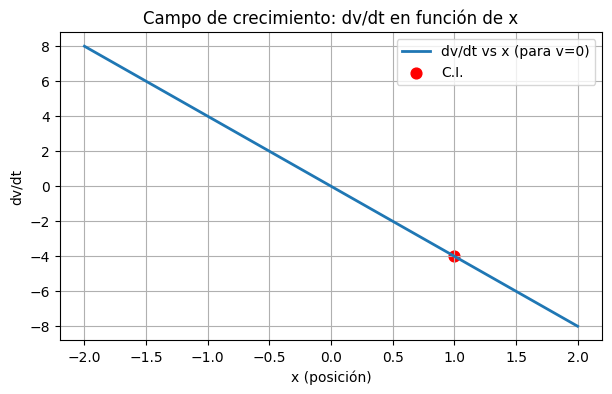

In [2]:

# Parámetros base para el ejercicio 1
m = 1.0
k = 4.0
x0 = 1.0
v0 = 0.0
t_max = 10.0
n_pts = 1000
t = np.linspace(0, t_max, n_pts)

omega = np.sqrt(k/m)

# Solución analítica
x_anal = x0 * np.cos(omega*t) + (v0/omega) * np.sin(omega*t)
v_anal = -x0 * omega * np.sin(omega*t) + v0 * np.cos(omega*t)

# Integración numérica
def f_nodamping(t, y):
    x, v = y
    return [v, -(k/m) * x]

sol = solve_ivp(f_nodamping, [0, t_max], [x0, v0], t_eval=t, rtol=1e-9, atol=1e-12)
x_num = sol.y[0]
v_num = sol.y[1]

# x(t)
plt.figure()
plt.plot(t, x_anal, label="x(t) analítica", lw=2)
plt.plot(t, x_num, '--', label="x(t) numérica", lw=2)
plt.scatter([0], [x0], c='red', s=60, label="C.I.")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("x(t): analítica vs numérica")
plt.legend()
plt.show()

# Diagrama de fase
phase_plot(x_anal, v_anal, x0, v0, title="Diagrama de fase (sin rozamiento, sin fuerza)")

# Campo de crecimiento: dv/dt vs x
growth_field_mass_spring(k, m, x0=x0, v0=v0, x_max=2.0)



> **Preguntas (responder en texto):**
> 1. Clasifica el sistema según:
>    - Relación entrada–salida  
>    - Tipo de incertidumbre  
>    - Naturaleza de tiempo  
>    - Dependencia temporal
>
> 2. ¿Qué tipo de comportamiento muestra el sistema en este caso?


### Respuestas al Ejercicio 1


1.  **Clasificación del sistema:**
    *   **Relación entrada–salida:** Es un sistema autónomo (o sin entrada). La ecuación `m*x'' + k*x = 0` no tiene un término `F(t)` que lo empuje desde fuera. Se mueve solo por sus condiciones iniciales.
    *   **Tipo de incertidumbre:** Es un sistema determinista. Si conocemos los parámetros (`m`, `k`) y las condiciones iniciales (`x0`, `v0`), podemos saber exactamente dónde estará la masa en cualquier instante de tiempo. No hay nada aleatorio.
    *   **Naturaleza de tiempo:** Es un sistema de tiempo continuo. El tiempo `t` fluye sin saltos, y la posición de la masa cambia de forma suave y continua.
    *   **Dependencia temporal:** Es un sistema invariante en el tiempo. Los parámetros `m` y `k` son constantes. La "física" del sistema no cambia con el tiempo. Si hacemos el experimento hoy o mañana, el resultado será el mismo.

2.  **Comportamiento del sistema:**
    El sistema muestra un movimiento armónico simple. Como no hay rozamiento que le quite energía, la masa oscila de un lado a otro para siempre con la misma amplitud. En el diagrama de fase, esto se ve como una elipse cerrada: el sistema repite el mismo ciclo una y otra vez sin parar.


## Ejercicio 2. Interacción con $k$, $m$ y C.I.

**Enunciado.** Añade interactividad al código del Ejercicio 1 para poder modificar **$k$**, **$m$**, **$x_0$** y **$v_0$**, y actualizar automáticamente las gráficas.

> **Pregunta (responder en texto):** ¿Qué observas al modificar $k$ y $m$? Razona tu respuesta.


### Respuesta al Ejercicio 2

Al modificar `k` (rigidez) y `m` (masa), observamos cómo cambia la frecuencia de oscilación (`omega = sqrt(k/m)`):

*   **Si aumentamos `k` (resorte más duro):** La oscilación se vuelve más rápida. El resorte tiene más fuerza y tira más de la masa, haciendo que la onda oscile más veces en el mismo tiempo.
*   **Si aumentamos `m` (más masa):** La oscilación se vuelve más lenta. A la masa le cuesta más moverse (tiene más inercia), por lo que el resorte tarda más en acelerarla y frenarla.

En resumen, la velocidad de la oscilación depende de la pelea entre la rigidez del resorte y la inercia de la masa.

In [ ]:
# Importamos las herramientas para interactividad
from ipywidgets import interact, FloatSlider

# Creamos una función que agrupa el código del Ejercicio 1
# Usamos el decorador @interact para crear sliders para los parámetros
@interact(
    k=FloatSlider(min=0.1, max=10.0, step=0.1, value=4.0, description='k (Rigidez)'),
    m=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='m (Masa)'),
    x0=FloatSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='x0 (Pos. inicial)'),
    v0=FloatSlider(min=-5.0, max=5.0, step=0.1, value=0.0, description='v0 (Vel. inicial)')
)
def interactive_mass_spring(k, m, x0, v0): 
    ''' 
    Al usar el decorador necesitamos si o si empaquetar el ejercicio anterior en una función,
    al modificar los parámetros con los sliders, se vuelve a ejecutar la función y se actualizan 
    las gráficas automáticamente.

    Esta función nunca es llamada directamente pero al usar el decorador @interact, se crea una interfaz
    interactiva automáticamente en el notebook con los sliders para cada parámetro.
    '''
    
    t_max = 10.0
    n_pts = 1000
    t = np.linspace(0, t_max, n_pts)

    # Frecuencia angular
    omega = np.sqrt(k/m)

    # Solución analítica 
    x_anal = x0 * np.cos(omega*t) + (v0/omega) * np.sin(omega*t)
    v_anal = -x0 * omega * np.sin(omega*t) + v0 * np.cos(omega*t)

    # Integración numérica 
    def f_nodamping(t, y):
        x, v = y
        return [v, -(k/m) * x]

    sol = solve_ivp(f_nodamping, [0, t_max], [x0, v0], t_eval=t, rtol=1e-9, atol=1e-12)
    x_num = sol.y[0]
    v_num = sol.y[1]

    # Gráfica de x(t)
    plt.figure(figsize=(7, 4))
    plt.plot(t, x_anal, label="x(t) analítica", lw=2)
    plt.plot(t, x_num, '--', label="x(t) numérica", lw=2)
    plt.scatter([0], [x0], c='red', s=60, label="C.I.")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.title("x(t): analítica vs numérica")
    plt.legend()
    plt.ylim(-abs(x_anal).max()*1.1, abs(x_anal).max()*1.1) 
    plt.grid(True)
    plt.show()

    # Gráfica del diagrama de fase
    phase_plot(x_anal, v_anal, x0, v0, title="Diagrama de fase (sin rozamiento, sin fuerza)")

    # Gráfica del campo de crecimiento
    growth_field_mass_spring(k, m, x0=x0, v0=v0, x_max=abs(x_anal).max()*1.1)


interactive(children=(FloatSlider(value=4.0, description='k (Rigidez)', max=10.0, min=0.1), FloatSlider(value=…


## Ejercicio 3. Añade rozamiento (amortiguamiento) con interacción. Incluye solamente la solución numérica

**Enunciado.** Extiende el modelo para incluir rozamiento viscoso $c\dot{x}$:
\begin{equation}
m \ddot{x} + c \dot{x} + k x = 0.
\end{equation}
Añade **interacción** también para $c$ (además de $k$, $m$, $x_0$, $v_0$).

> **Pregunta (responder en texto):** ¿Cómo se comporta ahora el sistema y qué observas al modificar el coeficiente de rozamiento $c$?


### Respuesta al Ejercicio 3

Ahora el sistema se comporta como un oscilador amortiguado. La energía ya no se conserva, sino que se va perdiendo por culpa del rozamiento.

Al modificar el coeficiente `c`:

*   **Si `c` es pequeño (poco rozamiento):** El sistema oscila, pero la amplitud de la oscilación disminuye poco a poco hasta que la masa se para en el punto de equilibrio. Esto se llama régimen subamortiguado. En el diagrama de fase, se ve como una espiral que se va cerrando hacia el centro.
*   **Si `c` es grande (mucho rozamiento):** El sistema ya ni siquiera llega a oscilar. La masa se mueve lentamente hacia la posición de equilibrio y se detiene. Esto se llama régimen sobreamortiguado.
*   **Hay un valor justo de `c`** (llamado amortiguamiento crítico) que hace que el sistema vuelva al equilibrio lo más rápido posible sin llegar a oscilar.

In [4]:
# Usamos de nuevo el decorador para la interactividad
@interact(
    k=FloatSlider(min=0.1, max=10.0, step=0.1, value=4.0, description='k (Rigidez)'),
    m=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='m (Masa)'),
    c=FloatSlider(min=0.0, max=5.0, step=0.1, value=0.5, description='c (Rozamiento)'),
    x0=FloatSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='x0 (Pos. inicial)'),
    v0=FloatSlider(min=-5.0, max=5.0, step=0.1, value=0.0, description='v0 (Vel. inicial)')
)
def interactive_mass_spring_damping(k, m, c, x0, v0):
    '''
    Aquí hacemos lo mismo que en el ejercicio 2, pero complicamos un poco el modelo.
    Ahora, además de la masa y el resorte, añadimos el rozamiento (parámetro 'c').

    La ecuación diferencial que resolvemos ahora es m*x'' + c*x' + k*x = 0. Esto hace 
    que la oscilación pierda energía y se vaya parando. Y usamos la solución analítica, 
    solo la numérica que calcula el ordenador.
    
    '''
    # Parámetros de simulación
    t_max = 15.0
    n_pts = 1000
    t = np.linspace(0, t_max, n_pts)

    # Definimos la EDO con rozamiento
    def f_damping(t, y):
        x, v = y
        # Ecuación: m*x'' + c*x' + k*x = 0  =>  x'' = -(c/m)*x' - (k/m)*x
        return [v, -(c/m)*v - (k/m)*x]

    # Resolvemos numéricamente
    sol = solve_ivp(f_damping, [0, t_max], [x0, v0], t_eval=t, rtol=1e-9, atol=1e-12)
    x_num = sol.y[0]
    v_num = sol.y[1]

    # Gráfica de x(t)
    plt.figure(figsize=(7, 4))
    plt.plot(t, x_num, lw=2, label="x(t) numérica")
    plt.scatter([0], [x0], c='red', s=60, label="C.I.")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.title("x(t) con rozamiento")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfica del diagrama de fase
    phase_plot(x_num, v_num, x0, v0, title="Diagrama de fase (con rozamiento)")


interactive(children=(FloatSlider(value=4.0, description='k (Rigidez)', max=10.0, min=0.1), FloatSlider(value=…


## Ejercicio 4. Añade fuerza sinusoidal con interacción. Incluye solamente la solución numérica

**Enunciado.** Extiende el modelo amortiguado para incluir una **fuerza externa sinusoidal**:
\begin{equation}
m \ddot{x} + c \dot{x} + k x = F_0 \sin(\Omega t).
\end{equation}
Añade interactividad para $F_0$ y $\Omega$ (además de $k$, $m$, $c$, $x_0$, $v_0$) e incluye la **solución**.


In [5]:
# Añadimos los últimos sliders para la fuerza externa
@interact(
    k=FloatSlider(min=0.1, max=10.0, step=0.1, value=4.0, description='k (Rigidez)'),
    m=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='m (Masa)'),
    c=FloatSlider(min=0.0, max=5.0, step=0.1, value=0.2, description='c (Rozamiento)'),
    x0=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='x0 (Pos. inicial)'),
    v0=FloatSlider(min=-5.0, max=5.0, step=0.1, value=0.0, description='v0 (Vel. inicial)'),
    F0=FloatSlider(min=0.0, max=10.0, step=0.1, value=1.0, description='F0 (Amplitud Fuerza)'),
    Omega=FloatSlider(min=0.1, max=10.0, step=0.1, value=2.0, description='Ω (Frec. Fuerza)')
)
def interactive_mass_spring_forced(k, m, c, x0, v0, F0, Omega):
    '''
    Al modelo con rozamiento del ejercicio 3, ahora le metemos una
    fuerza sinusoidal externa que empuja y estira el muelle.

    1.  Añadimos dos sliders más: F0 (la 'fuerza' del empujón) y Omega (la 'rapidez' con la que empuja).
    2.  La ecuación ahora es m*x'' + c*x' + k*x = F0*sin(Omega*t).
    3.  El sistema ahora es 'forzado'. Veremos cómo la fuerza externa puede 'dominar' el movimiento
        del muelle, sobre todo después de un tiempo.
    '''
    # Aumentamos el tiempo para ver el comportamiento a largo plazo
    t_max = 30.0
    n_pts = 2000
    t = np.linspace(0, t_max, n_pts)

    # Definimos la EDO con rozamiento y fuerza externa
    def f_forced(t, y):
        x, v = y
        # Ecuación: m*x'' + c*x' + k*x = F0*sin(Omega*t)
        # x'' = (F0*sin(Omega*t) - c*x' - k*x) / m
        fuerza = F0 * np.sin(Omega * t)
        return [v, (fuerza - c*v - k*x) / m]

    # Resolvemos numéricamente
    sol = solve_ivp(f_forced, [0, t_max], [x0, v0], t_eval=t, rtol=1e-9, atol=1e-12)
    x_num = sol.y[0]
    v_num = sol.y[1]

    # Gráfica de x(t)
    plt.figure(figsize=(7, 4))
    plt.plot(t, x_num, lw=2, label="x(t) numérica")
    plt.scatter([0], [x0], c='red', s=60, label="C.I.")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.title("x(t) con rozamiento y fuerza externa")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfica del diagrama de fase
    phase_plot(x_num, v_num, x0, v0, title="Diagrama de fase (con rozamiento y fuerza)")


interactive(children=(FloatSlider(value=4.0, description='k (Rigidez)', max=10.0, min=0.1), FloatSlider(value=…


> **Preguntas (responder en texto):**
> 1. Clasifica el sistema según:
>    - Relación entrada–salida  
>    - Tipo de incertidumbre  
>    - Naturaleza de tiempo  
>    - Dependencia temporal
> 2. ¿Cómo se comporta el sistema con distinta $\Omega$?.
> 3. ¿Qué sucede si definimos $\Omega = 0$?.


### Respuestas al Ejercicio 4

1.  **Clasificación del sistema:**
    *   **Relación entrada–salida:** Ahora es un sistema con entrada (o forzado). La entrada es la fuerza `F(t) = F0*sin(Omega*t)` y la salida es la posición `x(t)`.
    *   **Tipo de incertidumbre:** Sigue siendo determinista.
    *   **Naturaleza de tiempo:** Sigue siendo de tiempo continuo.
    *   **Dependencia temporal:** Sigue siendo invariante en el tiempo (los parámetros `m`, `c`, `k`, `F0` y `Omega` no cambian con el tiempo).

2.  **Comportamiento con distinta `Omega`:**
    El comportamiento del sistema tiene dos partes:
    *   **Régimen transitorio:** Al principio, el movimiento es una mezcla entre la oscilación natural del sistema (como en el ejercicio 3) y la influencia de la fuerza externa. Esta parte se disipa con el tiempo por el rozamiento.
    *   **Régimen estacionario:** Después de un tiempo, el sistema se olvida de sus condiciones iniciales y pasa a oscilar a la misma frecuencia que la fuerza externa (`Omega`). La amplitud de esta oscilación final depende mucho de `Omega`:
        *   Si `Omega` es muy diferente a la frecuencia natural del sistema, la amplitud es pequeña.
        *   Si `Omega` se acerca a la frecuencia natural del sistema (`sqrt(k/m)`), la amplitud de la oscilación crece muchísimo. Este fenómeno se llama **resonancia** y es famoso por poder romper estructuras si no se controla.

3.  **¿Qué sucede si `Omega = 0`?**
    Si `Omega = 0`, la fuerza `F0*sin(0*t)` es siempre cero. Por lo tanto, la ecuación se convierte en `m*x'' + c*x' + k*x = 0`, que es exactamente la misma que la del Ejercicio 3. El sistema se comportará como un oscilador amortiguado sin ninguna fuerza externa.